In [1]:
%cd /work/adapting-CLIP-VGPs/

from models.vgp_vit import VGPViT
import torch

GPU = 0
args = {
    'model': 'vit14',
    'alpha': 0.75,
    'aggregation': 'mean',
    'n_segments': list(range(100, 601, 50)),
    'temperature': 0.02,
    'upsample': 2,
    'start_block': 0,
    'compactness': 50,
    'sigma': 0,
}

model = VGPViT(**args).to(GPU)

/work/adapting-CLIP-VGPs


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3487: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


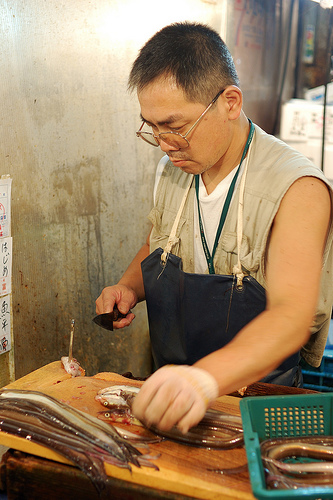

In [8]:
from PIL import Image
import numpy as np

img_path = 'data/flickr/flickr30k_images/2859601137.jpg'
img = Image.open(img_path).convert("RGB")
img_data = np.array(img.resize((224,224)))

img.show()

In [9]:
img.size

(333, 500)

In [10]:
phrases = ['a navy blue apron', 'a navy blue apron']
img_tensor = torch.from_numpy(img_data).to(GPU)
heatmaps = model(img_tensor, phrases)

/work/adapting-CLIP-VGPs/models/vgp_vit.py:56: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  np.float32)/255., n_segments=n, compactness=self.compactness, sigma=self.sigma)


(-0.5, 223.5, 223.5, -0.5)

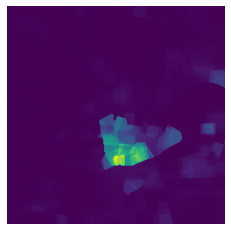

In [11]:
import matplotlib.pyplot as plt

plt.imshow(heatmaps[0])
plt.axis('off')

In [14]:
def contains_non_ascii(s):
    return any(ord(c) > 127 for c in s)
def replace_non_ascii(s):
    return ''.join(c if ord(c) < 128 else '?' for c in s)

def load_heatmap(path):
    data = np.load(path, allow_pickle=True)
    heatmap = np.array([data[f'arr_{i}'] for i in range(len(data))], dtype=np.float32)
    # heatmap_tensor = torch.from_numpy(heatmap).unsqueeze(0).unsqueeze(0).to(gpu)
    return heatmap

def save_heatmap(path, heatmap):
    try:
        np.savez_compressed(path, *heatmap)
        print("Saved!")
    except Exception as e:
        print(f"Error saving file: {path}")
        print("Error message:", e)

In [17]:
hm = heatmaps[0]

In [19]:
path = '/work/adapting-CLIP-VGPs/data/flickr/heatmaps/train/2859601137/a navy blue apron.npz'

save_heatmap(path, hm)

Saved!


(-0.5, 223.5, 223.5, -0.5)

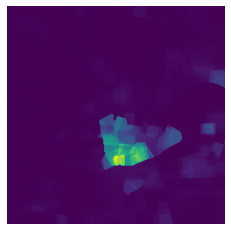

In [27]:
load = load_heatmap('/work/adapting-CLIP-VGPs/data/flickr/heatmaps/train/2859601137/a navy blue apron.npz')
plt.imshow(load)
plt.axis('off')

In [ ]:
def fix_heatmap(img_idx, split, phrase):
    img_path = f'data/flickr/flickr30k_images/{img_idx}.jpg'
    pil_img = Image.open(img_path).convert("RGB")
    pil_img.show()
    np_img = np.array(img.resize((224,224)))
    img_tensor = torch.from_numpy(img_data).to(GPU)
    phrases = [phrase, phrase]

    heatmaps = model(img_tensor, phrases)
    heatmap1 = heatmaps[0]

    path = f'/work/adapting-CLIP-VGPs/data/flickr/heatmaps/{split}/{img_idx}/{phrase}.npz'